# Vatnsendi distributed heating network

Lets load the network and plot the topology

In [42]:
import matplotlib.pyplot as plt
from epyt import epanet
import time

# Load the EPANET model
inp_file = "C:\\Users\\frodi\\Documents\\OptimisedHeating\\Epanet\\currently_working\\Vatnsendi_epanet_pumpcurve.inp"
d = epanet(inp_file)


EPANET version 20200 loaded (EPyT version v1.2.1 - Last Update: 09/01/2024).
Input File Vatnsendi_epanet_pumpcurve.inp loaded successfully.



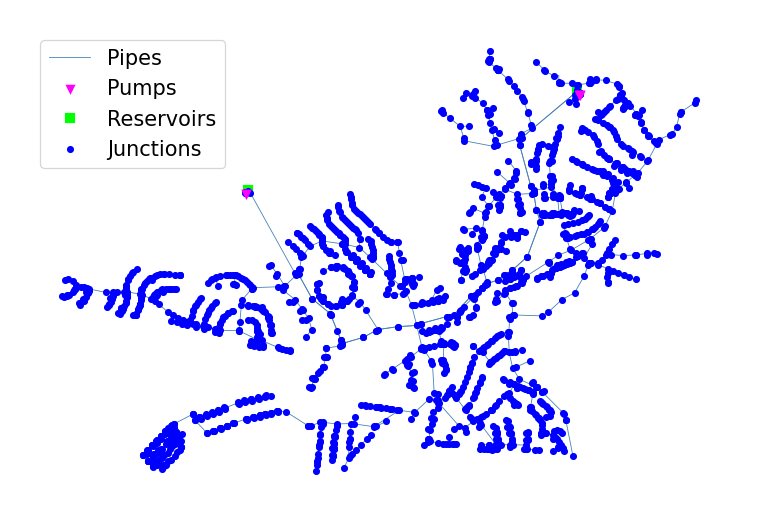

In [43]:
# Plot network topology
d.plot()
plt.show(block=True)  # Ensures only one plot is shown

In [44]:
# Set simulation time duration.
hrs = 0
d.setTimeSimulationDuration(hrs * 3600)

# Hydraulic analysis using epanet2.exe binary file.
start_1 = time.time()
hyd_res_1 = d.getComputedTimeSeries_ENepanet()
stop_1 = time.time()
hyd_res_1.disp()
etstep = 3600
d.setTimeReportingStep(etstep)
d.setTimeHydraulicStep(etstep)
d.setTimeQualityStep(etstep)
start_4 = time.time()
d.openHydraulicAnalysis()
d.initializeHydraulicAnalysis()
tstep, P, T_H, D, H, F = 1, [], [], [], [], []
while tstep > 0:
    t = d.runHydraulicAnalysis()
    P.append(d.getNodePressure())
    D.append(d.getNodeActualDemand())
    H.append(d.getNodeHydraulicHead())
    F.append(d.getLinkFlows())
    T_H.append(t)
    tstep = d.nextHydraulicAnalysisStep()
d.closeHydraulicAnalysis()


print(f'Pressure: {P}')
print(f'Demand: {D}')
print(f'Hydraulic Head {H}')
print(f'Flow {F}')



Time: [0]
Pressure: [[ 3.84096718e+01  3.85512772e+01  5.45401611e+01 ...  6.64653244e+01
   4.17480487e-06 -1.56249996e-06]]
Demand: [[ 0.00000000e+00  0.00000000e+00  6.99560046e-02 ...  0.00000000e+00
  -7.37051315e+01 -4.00701523e+01]]
Head: [[136.04296875 159.97128296 159.80015564 ... 163.06532288  90.00000763
  100.        ]]
NodeQuality: [[0. 0. 0. ... 0. 0. 0.]]
Flow: [[ 2.17863008e-01 -3.65887833e+00 -2.60987737e-13 ...  7.07586622e+00
   7.08013105e+00  2.59141884e+01]]
Velocity: [[2.14035720e-01 4.06140953e-01 7.05680956e-13 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
HeadLoss: [[  2.6112349    2.07747531   0.         ... -59.5371666  -59.53659821
  -36.9883194 ]]
Status: [[3 3 3 ... 3 3 3]]
Setting: [[5.90551179e-04 5.90551179e-04 5.90551179e-04 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]
ReactionRate: [[0. 0. 0. ... 0. 0. 0.]]
FrictionFactor: [[0.04027866 0.02647713 0.         ... 0.         0.         0.        ]]
LinkQuality: [[0. 0. 0. ... 0. 0. 0.]]

IndexError: list index out of range